# Monitor Your Amazon Competitors' Inventory!



### Objective

This script will create a spreadsheet of the competiting products that are currently "Out Of Stock" or low in stock, like shown below.

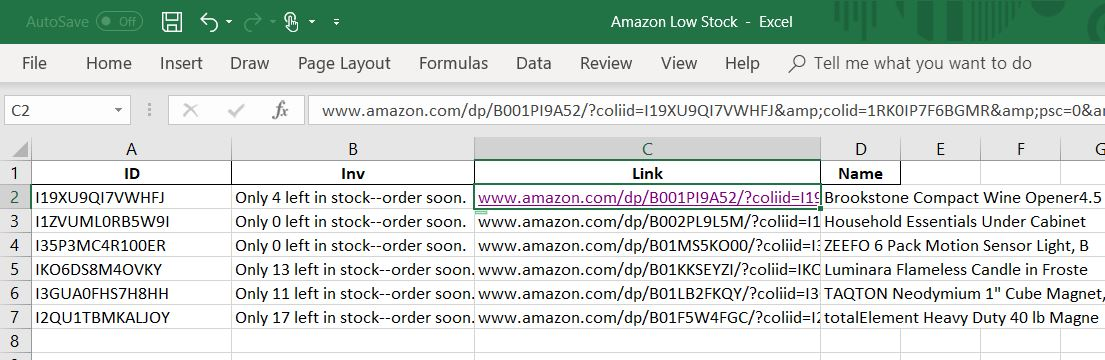

### Why is this useful? 

1. This could be an opportunity to push out competitors. When a product goes out of stock, Amazon drops their search ranking. 
2. Knowing when your competitors are/will be out of stock can help you make better informed restocking and pricing decisions. 

### Requirements

For this script to work, you must add your competitors' products to your Amazon wishlist. It can be any wishlist, just make sure you set it to "public". This script is unable to web-scrape private wishlists and Amazon searches. 

----------------------------------

### UPDATE 10/26/2018 -------

Amazon has changed the wishlist formatting, so that the inventory data does not show. As a result, this script can no longer return inventory data.

It is possible to adapt the script to return other pieces of information available through the wishlist page. 

---------------------------------



### The Action Plan

#### Section 1. Observe HTML of wishlist for clues on pattern extraction
#### Section 2. Extracting HTML data
#### Section 3. Organize data using vectors, polish the data (& if possible, systematize the process of data cleaning for reproducible results)
#### Section 4. Store data in spreadsheet








# Section 1. Observe HTML for Patterns

For the purposes of this project, we will be using [this](https://www.amazon.com/hz/wishlist/ls/18UQZ34U5ANT0?&sort=default) public wishlist. See below. 

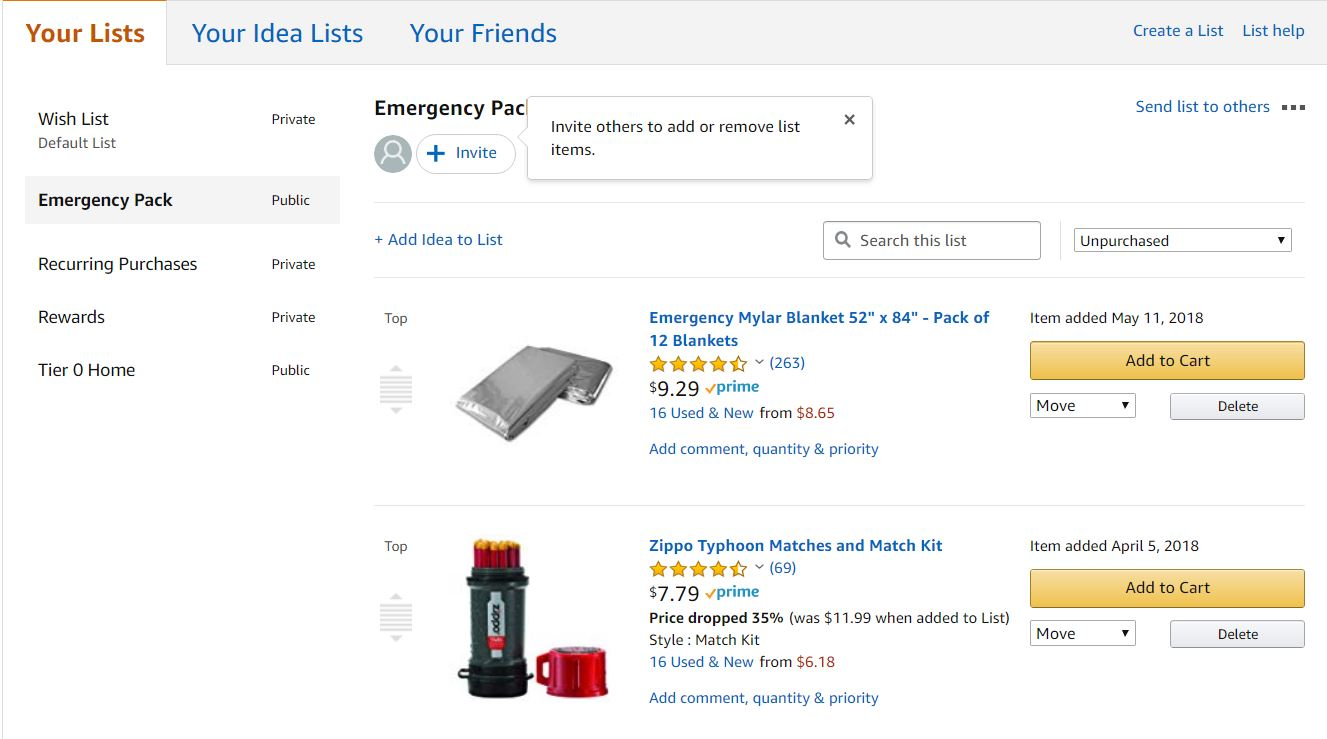

### The Mini Plan

1. Decide what information to extract
2. Determine how to extract desired information from HTML data

### 1. Deciding What Information To Extract

We observe the webpage, taking note of the information types, such as price, product name, stock status. 

- 14 items, after full loading.
- Stock/availability information shows as "In Stock", "Only X left in stock--order soon", "Out Of Stock", "Usually ships in X days"

It would be useful to extract:

- the website link
- product id
- product name
- inventory information

### 2. Determine How To Extract

Look at the HTML data to look for patterns. You can find the HTML data by right clicking the page & view page source.

To find patterns in the HTML data, try "finding" specific information you saw on the webpage. For example, if you saw a product with inventory information "Usually ships in 5 to 7 days", find that in the HTML data. Try to find when each products' HTML data starts and ends. This is useful because we can then extract these lines in a organized manner for further polishing. 

#### Observations of each product's HTML data

- Product ID consistently shows up 71 times for each item. 
(From observing individual listings, we can determine that the product ID comes after "coliid" in the web address.)
- The data-itemId tag shows up 3 times per item.

#### The Start of Each Product Section, Contains Product ID

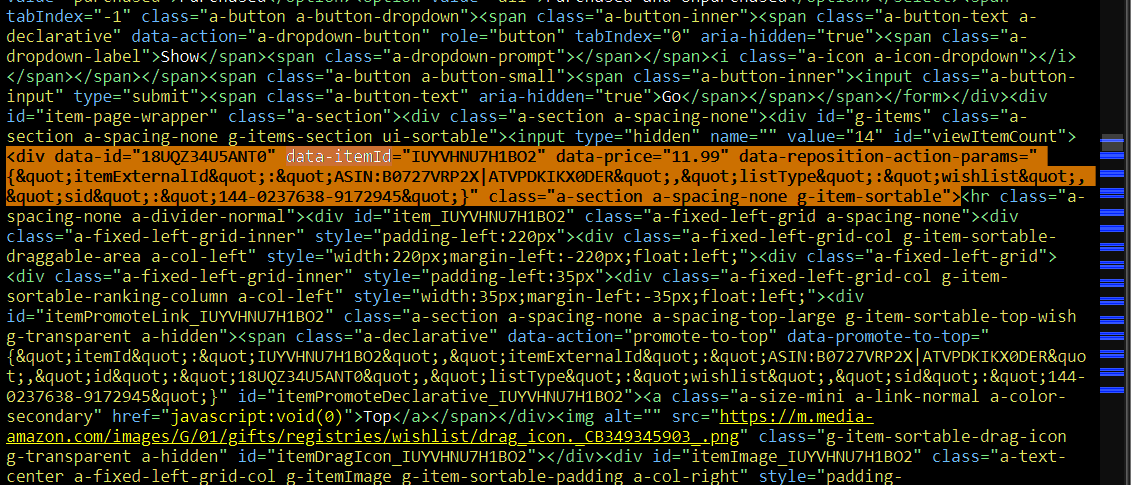

#### The Availability Info

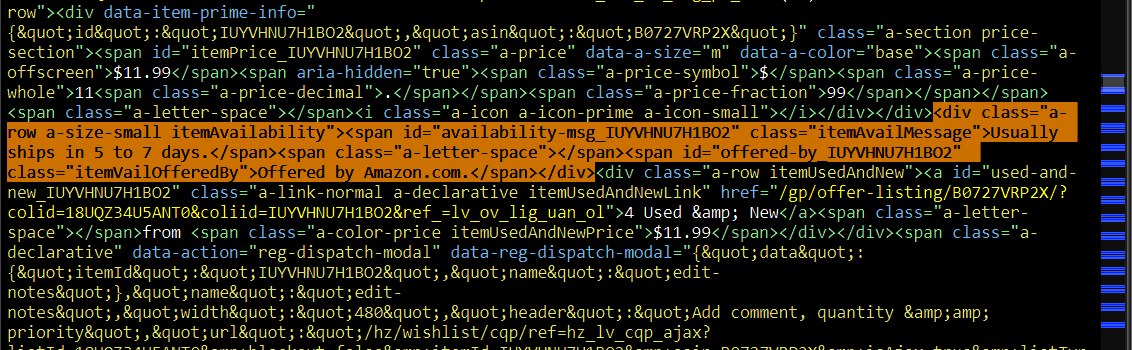

#### The Web Address, Name of Product

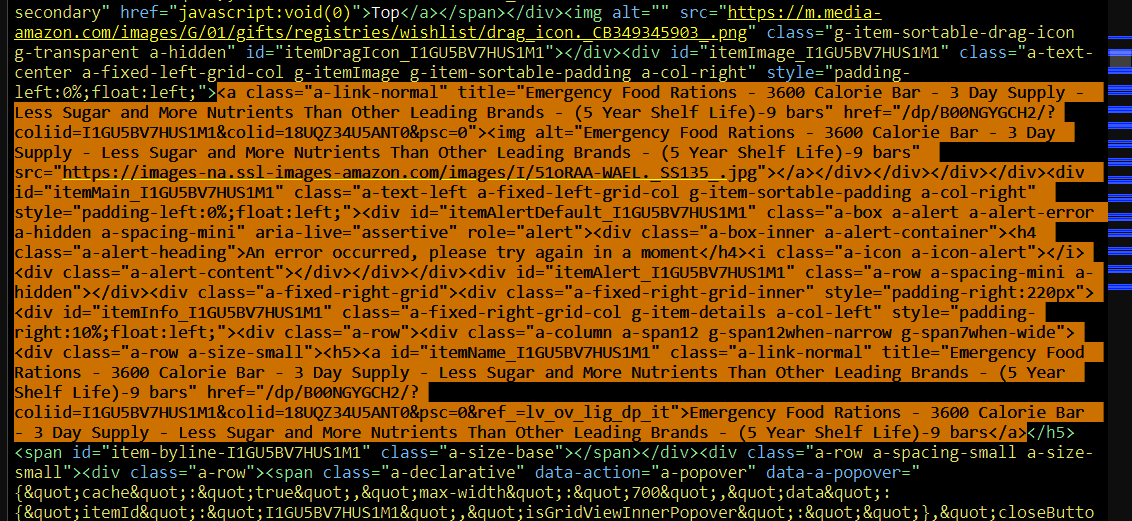

The name and address appears twice in the highlighted portion. Extracting either one would be fine. 

# Section 2. Extracting HTML Data Using Product ID

#### Setting Up Libraries

In [1]:
# setup libraries
# pip is a package management system
import pip
pip.main(["install", "bs4"])
# beautifulsoup parses HTML
from bs4 import BeautifulSoup
pip.main(["install", "requests"])
# requests, in this case, helps us get HTML from URL
import requests

You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


#### Target URL for Web-scraping

In [2]:
# Specify url to be web-scraped
## Train URL
# amz = "https://www.amazon.com/hz/wishlist/ls/18UQZ34U5ANT0?&sort=default"
## Test URL, more wild, sometimes contain no availability information
#amz = 'https://www.amazon.com/hz/wishlist/ls/2EMP67P298SMS?&sort=default'
## 30+ item wishlist
amz = 'https://www.amazon.com/hz/wishlist/ls/1RK0IP7F6BGMR?&sort=default'
## Note: must be PUBLIC

#### Getting and Parsing HTML Data

In [3]:
# load html data - webscrape
page = requests.get(amz)
stat = page.status_code
if str(stat)[0] == "2":
  ## if 200 or starts with 2, then it has completed
  print("Scraping Complete.")
else:
  print("Error...")

Scraping Complete.


In [4]:
# Parse the html and store it in Beautiful Soup format
soup = BeautifulSoup(page.content, 'html.parser')
# Look at the nested structure of the html page
print(soup.prettify())

<!DOCTYPE doctype html>
<html class="a-no-js" data-19ax5a9jf="dingo">
 <head>
  <script>
   var aPageStart = (new Date()).getTime();
  </script>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible">
   <title dir="ltr">
    Amazon.com
   </title>
   <link href="https://images-na.ssl-images-amazon.com/images/I/61WNuNhoJNL._RC|01evdoiemkL.css,01K+Ps1DeEL.css,31yErFkQitL.css,11PuQQlCaSL.css,11UGC+GXOPL.css,21LK7jaicML.css,11L58Qpo0GL.css,21EuGTxgpoL.css,01Xl9KigtzL.css,21IJTTf5-5L.css,019SHZnt8RL.css,01qy9K8SDEL.css,11vZhCgAHbL.css,21Mne54CsmL.css,11WgRxUdJRL.css,01dU8+SPlFL.css,11DGn6WmpTL.css,01SHjPML6tL.css,111-D2qRjiL.css,01QrWuRrZ-L.css,31CuFJrWvQL.css,114KWZGKCVL.css,01cbS3UK11L.css,01oZl+VEzRL.css_.css?AUIClients/AmazonUI#us.not-trident" rel="stylesheet"/>
   <link href="https://images-na.ssl-images-amazon.com/images/I/51ETMd1wu7L.css?AUIClients/RegistryAssets" rel="stylesheet"/>
   <link href="https://images-na.ssl-images-amazon.com/images/I/01yqpOn7stL

#### Extracting Each Product's HTML Section, using Product ID (data-itemid)

In [5]:
# Extracting product's HTML section using product ID
all_items = soup.find_all('div', class_="a-section a-spacing-none g-item-sortable")
## all_items is a "bs4.element.ResultSet", with each index pertaining to a different product
## by converting each index in all_item into a list --> list(all_items[0]), you can extract relevant info
### DO NOT convert all_items into a list, it will be too messy
all_items[0]

<div class="a-section a-spacing-none g-item-sortable" data-id="1RK0IP7F6BGMR" data-itemid="IEJUTU7T20F4A" data-price="-Infinity" data-reposition-action-params='{"itemExternalId":"ASIN:B074ZVP86V|ATVPDKIKX0DER","listType":"wishlist","sid":"000-0000000-0000000"}'><hr class="a-spacing-none a-divider-normal"/><div class="a-fixed-left-grid a-spacing-none" id="item_IEJUTU7T20F4A"><div class="a-fixed-left-grid-inner" style="padding-left:220px"><div class="a-fixed-left-grid-col a-col-left" style="width:220px;margin-left:-220px;float:left;"><div class="a-fixed-left-grid"><div class="a-fixed-left-grid-inner" style="padding-left:35px"><div class="a-fixed-left-grid-col a-col-left" style="width:35px;margin-left:-35px;float:left;"></div><div class="a-text-center a-fixed-left-grid-col g-itemImage g-item-sortable-padding a-col-right" id="itemImage_IEJUTU7T20F4A" style="padding-left:0%;float:left;"><a class="a-link-normal" href="/dp/B074ZVP86V/?coliid=IEJUTU7T20F4A&amp;colid=1RK0IP7F6BGMR&amp;psc=0" ti

# 3. Organizing Data Using Vectors, Polishing Data

In [6]:
# Initializing lists to be contained with data
inv = []
names = []
prodid = []
website = []

# TRANSFERRING RELEVANT INFO INTO VECTORS

########## PRODUCT ID ############
for i in range(0,len(all_items)):
    productzero = list(all_items[i])
    # productzero contain 2 elements, with the second element containing what we want.
    productzero = str(productzero[1])
    # Converting element into string, before indexing
    # Searching for index positions of Product ID number
    start = productzero.index("item_") + 5
    # +5 , .index("item_") returns the index position of the first character "i"
    end = productzero.index(">") - 1
    # Rmb: Python indexing includes first index, stops at 2nd index, exclusive
    # Product ID
    #print("Product ID %s: " %i, productzero[start:end])
    prodid.append(productzero[start:end])

########## INVENTORY ##########    
for i in range(0,len(all_items)):
    ## Note: Requires the start and end values of PRODUCT ID section
    productinv = all_items[i].find_all("span", id="availability-msg_%s" %(productzero[start:end]))
    productinv = str(productinv)
    # NOTE: ERROR 
    # There was an error with inv, due to the 5th and other items, not containing inv info, so the function stopped running
    if len(productinv) == 2:
        inv.append("Only 0 left in stock--order soon.")
    else:
        start = productinv.index(">") + 1
        end = productinv.index("</span>]")
        inv.append(productinv[start:end])
    
########## WEBSITE ########## 
for i in range(0,len(all_items)):
    # Refining the portion that contains website, for extracting
    productweb = all_items[i].find_all('a', class_="a-link-normal")
    productweb = str(productweb[1])
    # Index position of website
    start = productweb.index("href=\"") + 6
    end = productweb.index(" id=") - 1
    website.append("www.amazon.com"+productweb[start:end])
    
########## NAME ##########
for i in range(0,len(all_items)):
    productname = all_items[i].get_text()
    start = productname.index("moment") + 6
    end = start + 35
    names.append(productname[start:end])

In [7]:
# Inventory Data
print(inv)

['Currently unavailable', 'In Stock', 'Only 4 left in stock--order soon.', "Temporarily out of stock. Order now and we'll deliver when available.", 'Currently unavailable', 'In Stock', 'In Stock', 'In Stock', 'In Stock', 'In Stock', 'Only 0 left in stock--order soon.', 'In Stock', 'In Stock', 'Usually ships in 3 to 5 days', 'In Stock', 'In Stock', 'Currently unavailable', 'In stock. Usually ships within 2 to 3 days.', 'Only 0 left in stock--order soon.', 'In stock. Usually ships within 3 to 4 days.', 'In Stock', 'In Stock', 'Only 13 left in stock--order soon.', 'Currently unavailable', 'Only 11 left in stock--order soon.', 'In Stock', 'Only 17 left in stock--order soon.', 'In Stock']


In [8]:
# Product Names
print(names)

['DEVAISE Height Adjustable Multi-fun', '3 Panel Solid Wood Screen Room Divi', 'Brookstone Compact Wine Opener4.5 o', 'Rubbermaid Unbreakable Expandable T', 'HKF3528-BSK12WW-D3.8 out of 5 stars', 'Dewalt DCD771C2 20V MAX Cordless Li', 'VELCRO Brand - Industrial Strength ', 'WE Games Wood GO Set with Pull Out ', 'Emergency Mylar Blanket 52" x 84" -', 'Instant Pot DUO60 6 Qt 7-in-1 Multi', 'Household Essentials Under Cabinet ', '4 LUFFY Marimo Moss Balls - Aesthet', 'Eucalan Lavender Fine Fabric Wash 1', 'Sauder Double Door Storage Cabinet,', 'DecoBros 2 Tier Mesh Sliding Cabine', 'Midea WHS-65LB1 Compact Single Reve', 'Coway AP-1512HH Mighty Air Purifier', 'Lysol Bowl Brush with Rim Extension', 'ZEEFO 6 Pack Motion Sensor Light, B', 'IRIS Small Drop Front Shoe Box, 6 P', '2 Tier Clear Wall Mounted Acrylic D', 'Luminara Flameless Candle in Froste', 'Luminara Flameless Candle in Froste', 'Instant Pot Accu SV800 Sous Vide Im', 'TAQTON Neodymium 1" Cube Magnet, N5', 'LOPOO LED Strip Light (

In [9]:
# Product Websites
print(website)

['www.amazon.com/dp/B074ZVP86V/?coliid=IEJUTU7T20F4A&amp;colid=1RK0IP7F6BGMR&amp;psc=0&amp;ref_=lv_vv_lig_dp_it', 'www.amazon.com/dp/B00G5LMUCO/?coliid=I1MFX8V5XA97ML&amp;colid=1RK0IP7F6BGMR&amp;psc=0&amp;ref_=lv_vv_lig_dp_it', 'www.amazon.com/dp/B001PI9A52/?coliid=I19XU9QI7VWHFJ&amp;colid=1RK0IP7F6BGMR&amp;psc=0&amp;ref_=lv_vv_lig_dp_it', 'www.amazon.com/dp/B00006IANF/?coliid=I1FQ3XMELSNKL6&amp;colid=1RK0IP7F6BGMR&amp;psc=1&amp;ref_=lv_vv_lig_dp_it', 'www.amazon.com/dp/B01HZMD61U/?coliid=I1QH11SS14DGLG&amp;colid=1RK0IP7F6BGMR&amp;psc=0&amp;ref_=lv_vv_lig_dp_it', 'www.amazon.com/dp/B00ET5VMTU/?coliid=IKKY8MV68QUZK&amp;colid=1RK0IP7F6BGMR&amp;psc=1&amp;ref_=lv_vv_lig_dp_it', 'www.amazon.com/dp/B0006HWYJM/?coliid=I2DCP1OLQUVOF2&amp;colid=1RK0IP7F6BGMR&amp;psc=0&amp;ref_=lv_vv_lig_dp_it', 'www.amazon.com/dp/B0008EJXEW/?coliid=I2F3L8H4FB8FJ9&amp;colid=1RK0IP7F6BGMR&amp;psc=0&amp;ref_=lv_vv_lig_dp_it', 'www.amazon.com/dp/B0047D6XA2/?coliid=I3VM7E3MSZSPZY&amp;colid=1RK0IP7F6BGMR&amp;psc=0&am

In [10]:
# Product ID
print(prodid)

['IEJUTU7T20F4A', 'I1MFX8V5XA97ML', 'I19XU9QI7VWHFJ', 'I1FQ3XMELSNKL6', 'I1QH11SS14DGLG', 'IKKY8MV68QUZK', 'I2DCP1OLQUVOF2', 'I2F3L8H4FB8FJ9', 'I3VM7E3MSZSPZY', 'IIE5CP9MILWG5', 'I1ZVUML0RB5W9I', 'IOOO2AM50DODI', 'I2WSDQR1ZLBXMA', 'I2GLS01K0H5BKZ', 'I23QDILTTNEZSP', 'I3OAY01D0E2F7', 'IAQF4FUY9BTJY', 'I2LEQM6J2IDF8B', 'I35P3MC4R100ER', 'I18INHB0FTIH9B', 'I1ZHJCE3XYIGSP', 'IMAZA29H4DLBM', 'IKO6DS8M4OVKY', 'I11WFBDU07L144', 'I3GUA0FHS7H8HH', 'I1KDOGZBFQOM8H', 'I2QU1TBMKALJOY', 'I2ATEYUK9LKW4L']


# Section 4. Inputting into Excel

### Excel Sheet With All Products (Incl. "In Stock" Products)

In [11]:
# Inputting ALL info into Excel

import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np
 
df = pd.DataFrame({'ID':prodid,
                   'Inv':inv,
                   'Name':names,
                   'Link':website})
 
writer = ExcelWriter('Amazon Inventory Data.xlsx')
df.to_excel(writer,'Sheet1',index=False)
writer.save()

# Functions
## Dataframe -> transform into
## ExcelWriter('workbook') -> creates new workbook named ()
## dataframe.to_excel -> Writes dataframe to (workbook, 'Worksheet name', index=FALSE)
## workbook.save -> saves changes

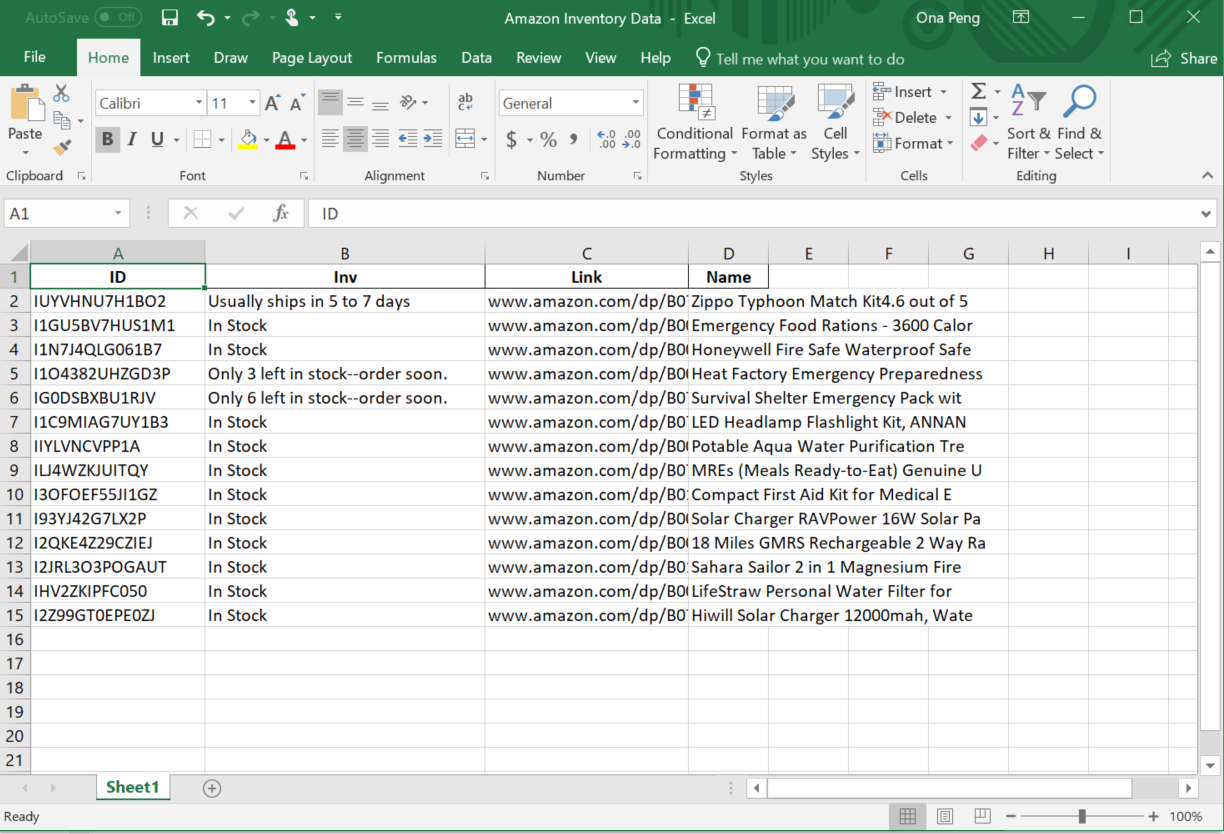

In [12]:
print(inv)

['Currently unavailable', 'In Stock', 'Only 4 left in stock--order soon.', "Temporarily out of stock. Order now and we'll deliver when available.", 'Currently unavailable', 'In Stock', 'In Stock', 'In Stock', 'In Stock', 'In Stock', 'Only 0 left in stock--order soon.', 'In Stock', 'In Stock', 'Usually ships in 3 to 5 days', 'In Stock', 'In Stock', 'Currently unavailable', 'In stock. Usually ships within 2 to 3 days.', 'Only 0 left in stock--order soon.', 'In stock. Usually ships within 3 to 4 days.', 'In Stock', 'In Stock', 'Only 13 left in stock--order soon.', 'Currently unavailable', 'Only 11 left in stock--order soon.', 'In Stock', 'Only 17 left in stock--order soon.', 'In Stock']


### Low Stock Only Excel Sheet

In [13]:
# Vector containing index positions for low-stock products
lowstockindex = []

for i in range(0,len(inv)):
    if inv[i][0:4] == "Only":
        lowstockindex.append(i)
        
lowstockindex

[2, 10, 18, 22, 24, 26]

In [14]:
# Low Stock Dataframe and Excel Input
lowprodid = []
lowinv = []
lownames = []
lowlink = []

for i in range(0,len(lowstockindex)):
    lowprodid.append(prodid[lowstockindex[i]])
    lowinv.append(inv[lowstockindex[i]])
    lownames.append(names[lowstockindex[i]])
    lowlink.append(website[lowstockindex[i]])
    

In [15]:
# Writing To Excel
dflow = pd.DataFrame({'ID':lowprodid,
                   'Inv':lowinv,
                   'Name':lownames,
                   'Link':lowlink})
 
writer2 = ExcelWriter('Amazon Low Stock.xlsx')
dflow.to_excel(writer2,'Sheet1',index=False)
writer2.save()

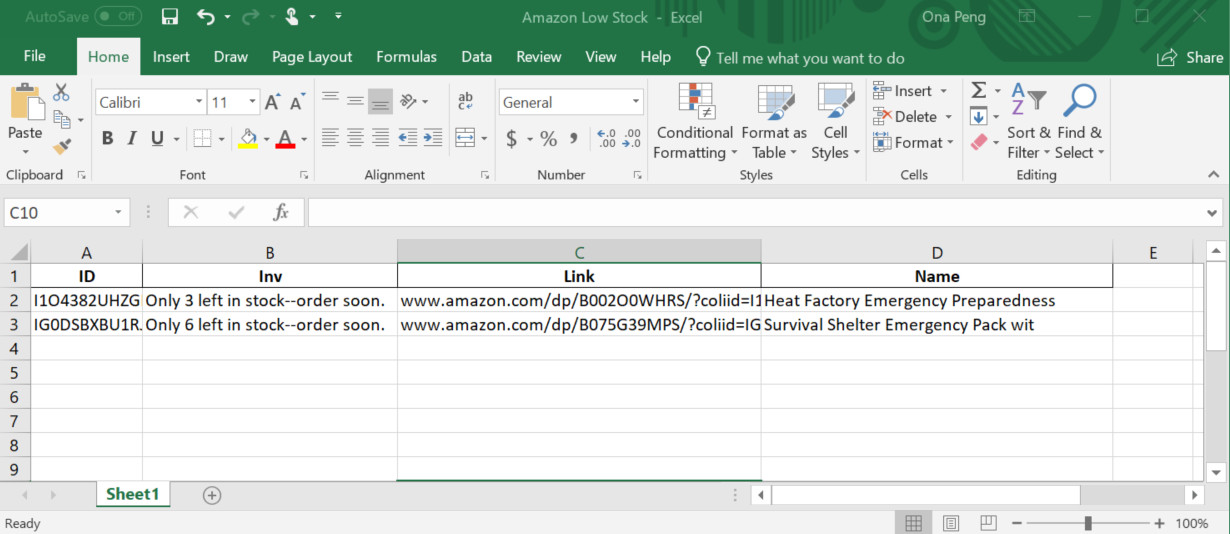